<a href="https://colab.research.google.com/github/Rohanpk23/Python_EDA/blob/main/EDA_on_sales_data_(Mini_project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Original dataset
sales = pd.read_csv("/content/drive/My Drive/Colab Notebooks/sales_subset.csv", index_col = 0)
sales.date = pd.to_datetime(sales["date"])
sales

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...
10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716
10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244
10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989
10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623


In [ ]:
sl = sales
sl

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...
10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716
10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244
10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989
10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623


# Summary stats

There are no null values

In [ ]:
sl.isna().sum()

store                   0
type                    0
department              0
date                    0
weekly_sales            0
is_holiday              0
temperature_c           0
fuel_price_usd_per_l    0
unemployment            0
dtype: int64

In [ ]:
# Weekly sales, temp, fuel price and unempl
num_data = ["weekly_sales", "temperature_c", "fuel_price_usd_per_l", "unemployment"]
sl[num_data].describe()

,weekly_sales,temperature_c,fuel_price_usd_per_l,unemployment
count,10774.000000,10774.000000,10774.000000,10774.000000
mean,23843.950149,15.731978,0.749746,8.082009
std,30220.387557,9.922446,0.059494,0.624355
min,-1098.000000,-8.366667,0.664129,3.879000
25%,3867.115000,7.583333,0.708246,7.795000
50%,12049.065000,16.966667,0.743381,8.099000
75%,32349.850000,24.166667,0.781421,8.360000
max,293966.050000,33.827778,1.107674,9.765000


In [ ]:
sl[num_data[0]].hist(grid = False)
plt.title(num_data[0])
plt.show()
sl[num_data[1]].hist(grid = False)
plt.title(num_data[1])
plt.show()
sl[num_data[2]].hist(grid = False)
plt.title(num_data[2])
plt.show()
sl[num_data[3]].hist(grid = False)
plt.title(num_data[3])
plt.show()

1. *What are the store types and store departments*

There are **11** unique stores that are further identified by their store type ID and department ID. Store types are **A & B** with **10 A** but only **1 B** store. There are **80 departments**.

In [ ]:
# Store Types
types = sl.drop_duplicates(subset = "type").reset_index(drop = True) # Removing duplicates and removing the default indexes
print(types["type"])

0    A
1    B
Name: type, dtype: object


In [ ]:
# Getting unique department Ids
store_depts = sl.drop_duplicates(subset = ["department"]).reset_index(drop = True)
store_depts.sort_values("department")["department"]

0      1
1      2
2      3
3      4
4      5
      ..
72    95
73    96
74    97
75    98
76    99
Name: department, Length: 80, dtype: int64

In [ ]:
# Getting all the unique stores
store_types = sl.drop_duplicates(subset = ["store", "type"])
store_types = store_types[["store", "type"]].reset_index(drop = True)
print(store_types)

    store type
0       1    A
1       2    A
2       4    A
3       6    A
4      10    B
5      13    A
6      14    A
7      19    A
8      20    A
9      27    A
10     31    A
11     39    A


In [ ]:
# Getting all the unique dates
dat = sl.drop_duplicates("date")
dat.date.sort_values().reset_index(drop = True, inplace = False)

0     2010-02-05
1     2010-02-12
2     2010-02-19
3     2010-02-26
4     2010-03-05
         ...    
118   2012-09-21
119   2012-09-28
120   2012-10-05
121   2012-10-12
122   2012-10-26
Name: date, Length: 123, dtype: datetime64[ns]

Store Ids with their total sale and average temperature

In [ ]:
# Total weekly sales
storeId_sales = sl.groupby(by = "store", axis = 0)["weekly_sales"].agg([np.sum, np.mean])
storeId_sales

,sum,mean
store,,
1,18828144.55,20896.941787
2,23786139.34,26517.435162
4,23540414.45,26126.986071
6,19275700.71,21561.186477
10,23178403.89,25696.678370
13,23431368.47,25664.149474
14,26889842.67,30384.003017
19,18057339.37,19930.838157
20,25828317.41,28382.766385


In [ ]:
# Average temperature
storeId_avg_temp = sl.groupby(by = "store", axis = 0)["temperature_c"].mean()
storeId_avg_temp

store
1     18.485707
2     18.246755
4     14.257011
6     18.738423
10    21.211327
13    10.258945
14    13.751557
19    10.668758
20    11.783010
27    13.704944
31    18.553308
39    19.395619
Name: temperature_c, dtype: float64

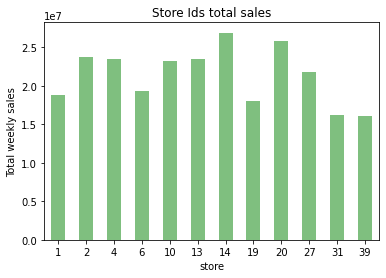

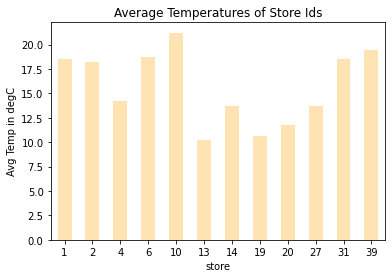

In [ ]:
storeId_sales = sl.groupby(by = "store", axis = 0)["weekly_sales"].sum()
storeId_sales.plot(kind = "bar", rot = 0, color = "green", alpha = 0.5)
plt.title("Store Ids total sales")
plt.ylabel("Total weekly sales")
plt.show()

storeId_avg_temp = sl.groupby(by = "store", axis = 0)["temperature_c"].mean()
plt.title("Average Temperatures of Store Ids")
plt.ylabel("Avg Temp in degC")
storeId_avg_temp.plot(kind = "bar", rot = 0, color = "orange", alpha = 0.3)
plt.show()

**Date wise weekly sales**\
Except for 12 days between Jan 2010 to Jan 2011, average weekly sales have been very low and sales frequency being high between May 2011 to May 2012

In [ ]:
sales_byDate = sl.pivot_table(values = "weekly_sales", index = "date", aggfunc=[np.sum, np.mean])
sales_byDate

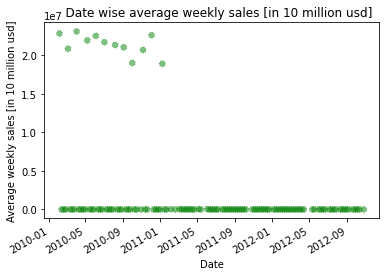

In [ ]:
# Plotting
fig, ax = plt.subplots(1,1)
y = sales_byDate.iloc[:, 0]
x = pd.Series(sales_byDate.index)
ax.scatter(x,y, marker = "o", linestyle = "dotted", color = "g", alpha = 0.5)

# Labelling
ax.set_xlabel("Date")
ax.set_ylabel("Average weekly sales [in 10 million usd]")
ax.set_title("    Date wise average weekly sales [in 10 million usd]")

# Autofit
fig.autofmt_xdate()
plt.show()

**Department wise weekly sales**

In [ ]:
sales_bydept = sl.groupby(by = "department")["weekly_sales"].sum()
sales_bydept

department
1      4615555.27
2     10278723.28
3      2632088.25
4      6460308.53
5      5355216.00
         ...     
95    17284245.13
96     2806589.86
97     3828153.72
98     1702165.00
99       46632.21
Name: weekly_sales, Length: 80, dtype: float64

Finding out if there is any correlation between the numerical variables

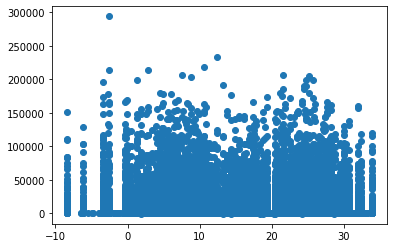

In [ ]:
temp = sl.iloc[:,6] 
fuel = sl.iloc[:,7]
emp = sl.iloc[:, 8]
ws = sl.iloc[:, 4]
plt.scatter(temp, ws)